In [1]:
import pandas as pd
import numpy as np

## Configs

In [2]:
start_date = '20220725'
end_date = '20220811'
ep_level = 'geo_peak'

city = 'Chennai'

service = 'Link'

PATH_TO_ROOT_DIR = '/Users/pallavichandra/commit_repo/lchf_super_clusters/dse-demand-analysis/'

## Read Data

In [4]:
data_for_sample_size = pd.read_csv(
        PATH_TO_ROOT_DIR + '''experiments/price_sensitivity/price_elasticity/data/{city}/ep_curve_chart/{service}/Ep_chart_fe2rr_surge_{start_date}_{end_date}_{ep_level}.csv'''.format(
            city=city,
            start_date=start_date,
            end_date = end_date,
            ep_level=ep_level,
            service=service
        ))

data_for_sample_size.head()

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N
0,Chennai,20220725,Monday,Anna Nagar,morning_peak,non_experiment,20.0,111.349057,20.0,106,36,106,12,16,9,0.1132,0.5625
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800
2,Chennai,20220725,Monday,T Nagar,morning_peak,non_experiment,20.0,101.461538,20.0,39,23,39,7,9,6,0.1795,0.6667
3,Chennai,20220725,Monday,Vadapalani,morning_peak,non_experiment,20.0,114.164948,20.0,97,41,97,9,9,4,0.0928,0.4444
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500


## Calculating sample size

### <font color = 'green'> Using Standard Deviation </font>

In [60]:
def calculate_sample_size_using_std(std_dev, d):
    
    sample_size = int(np.ceil(((1.96)*(1.96)*(std_dev)*(std_dev))/d*d))
    
    return sample_size

In [64]:
d = 0.05
std = data_for_sample_size[(data_for_sample_size['pickup_cluster'] == 'Nungambakkam') & 
                           (data_for_sample_size['time_period'] == 'morning_peak')]['FE_RR'].std()

conversion_std_in_pct = 100*round(std,4)


In [62]:
print("************INPUT DATA FOR CALCULATING SAMPLE SIZE**************")
print('')
print("Standard Deviation: ", conversion_std_in_pct, '%')
print("Degree of precision: ", d)
print('')
print("****************************************************************")


************INPUT DATA FOR CALCULATING SAMPLE SIZE**************

Standard Deviation:  5.79 %
Degree of precision:  0.05

****************************************************************


In [63]:
sample_size = calculate_sample_size_using_std(conversion_std_in_pct, d)

print("Sample size using standard deviation: ", sample_size)

Sample size using standard deviation:  129


### Conclusion
> <font color = 'firebrick'> The sample size should be 129 to estimate the customers of our interest who will exhibit change in requesting a ride for the given change in price having an errrr rate of 5%. 

----

### <font color = 'green'> Using Proportion </font> 

In [70]:
def calculate_sample_size_using_proportion(p, d):
    
    sample_size = int(np.ceil(((1.96)*(1.96)*(p)*(1-p))/d*d))
    
    return sample_size

In [72]:
d = 0.05
p = 0.75

sample_size = calculate_sample_size_using_proportion(p,d)

sample_size

286

### Conclusion
> <font color = 'firebrick'> The sample size should be 286 to estimate the true proportion of customers who will exhibit change in requesting a ride for the given change in price having an error rate of 5%. 

---

## t-test 

In [99]:
import scipy.stats as stats

### <font color = 'green'> Create a dataframe </font>

In [100]:
data = {
    'w_emp_sal': [
        2000, 2500, 2000, 2300, 3400, 4500, 6500, 6300, 2300, 6500, 4500, 6700, 6500, 2300, 3000, 3200]}

w_emp_sal_data = pd.DataFrame(data)

w_emp_sal_data

,w_emp_sal
0,2000
1,2500
2,2000
3,2300
4,3400
5,4500
6,6500
7,6300
8,2300
9,6500


In [101]:
# perform one sample t-test
t_statistic, p_value = stats.ttest_1samp(a=w_emp_sal_data, popmean=2500)
print(t_statistic , p_value)

[3.26666667] [0.00520254]


In [102]:
w_emp_sal_data.describe()

,w_emp_sal
count,16.00
mean,4031.25
std,1875.00
min,2000.00
25%,2300.00
50%,3300.00
75%,6350.00
max,6700.00


In [103]:
round(((4031.25 - 2500)*4)/1875, 4)

3.2667

### Conclusion
> <font color = 'firebrick'> tactual > tcritical of 1.96 therefore we will reject null hypothesis that mean salary of the woman is 2500 </font>

## Compute t-test for the two sampled test

### <font color = 'green'> Using scipy stats </font>

In [104]:
data_group2 = {
    'w_emp_sal': [
        3000, 3500, 3000, 3000, 3400, 4500, 5500, 6300, 3000, 6500, 4500, 6700, 6500, 4500, 6500, 7000]}

w_emp_sal_group2 = pd.DataFrame(data_group2)


w_emp_sal_group2

,w_emp_sal
0,3000
1,3500
2,3000
3,3000
4,3400
5,4500
6,5500
7,6300
8,3000
9,6500


In [105]:
t_statistic, p_value = stats.ttest_ind(a=w_emp_sal_data, b=w_emp_sal_group2, equal_var=True)

t_statistic, p_value

(array([-1.32062838]), array([0.19661189]))

### Conclusion

> <font color = 'firebrick'> tactual < tcritical of - 1.96 therefore we are not able to reject the null hypothesis and the mean salary of the two samples are not significantly different at 0.05 alpha level </font>

### <font color = 'green'> Using statsmodels </font>

In [106]:
from statsmodels.stats.weightstats import ttest_ind


ttest_ind(w_emp_sal_data, w_emp_sal_group2)

(array([-1.32062838]), array([0.19661189]), 30.0)

### Conclusion

> <font color = 'firebrick'> tactual < tcritical of - 1.96 therefore we are not able to reject the null hypothesis and the mean salary of the two samples are not significantly different at 0.05 alpha level </font>

-----

## Distributions

In [116]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# # for displaying images
# from IPython.core.display import Image

In [132]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
# sns.set(color_codes=False)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [133]:
# import uniform distribution
from scipy.stats import uniform

In [134]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

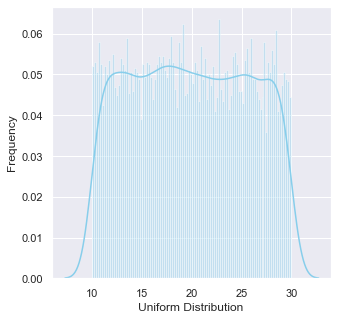

In [154]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

---

## Normal Distribution

In [136]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

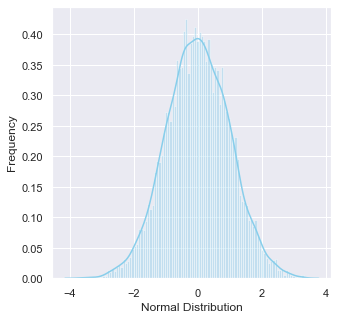

In [152]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Poisson Distribution

In [138]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

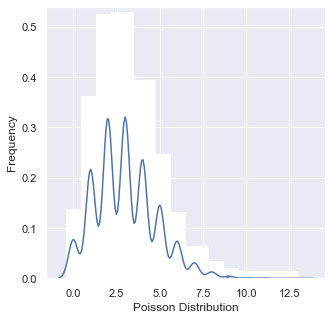

In [148]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 17.200000000000003, 'Poisson Distribution'),
 Text(17.200000000000003, 0.5, 'Frequency')]

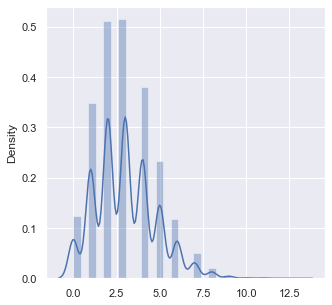

In [151]:
sns.distplot(data_poisson,bins=30,
                  kde=True)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Create a model and perform t-test

In [155]:
import statsmodels.formula.api as smf

In [156]:
data_for_sample_size

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N
0,Chennai,20220725,Monday,Anna Nagar,morning_peak,non_experiment,20.0,111.349057,20.0,106,36,106,12,16,9,0.1132,0.5625
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800
2,Chennai,20220725,Monday,T Nagar,morning_peak,non_experiment,20.0,101.461538,20.0,39,23,39,7,9,6,0.1795,0.6667
3,Chennai,20220725,Monday,Vadapalani,morning_peak,non_experiment,20.0,114.164948,20.0,97,41,97,9,9,4,0.0928,0.4444
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Chennai,20220810,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,100.487395,20.0,476,177,476,44,53,36,0.0924,0.6792
66,Chennai,20220811,Thursday,Anna Nagar,morning_peak,non_experiment,20.0,116.867925,20.0,477,239,477,66,73,50,0.1384,0.6849
67,Chennai,20220811,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,79.320000,20.0,400,205,400,67,80,67,0.1675,0.8375
68,Chennai,20220811,Thursday,T Nagar,morning_peak,non_experiment,20.0,72.567347,20.0,245,112,245,42,41,35,0.1714,0.8537


In [180]:
reg_model = smf.ols(
    formula = "avg_amount_payable ~ FE_RR" , data = data_for_sample_size).fit(cov_type = 'HC1')

In [181]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     avg_amount_payable   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     25.28
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           3.84e-06
Time:                        21:07:21   Log-Likelihood:                -313.81
No. Observations:                  70   AIC:                             631.6
Df Residuals:                      68   BIC:                             636.1
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.3951      8.678     15.602      0.000     118.387     152.404
FE_RR       -267.6669     53.235     -5.028      0.000    -372.005    -163.329
==============================================================================
Omnibus:                        7.001   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.092
Skew:                           0.508   Prob(JB):                       0.0288
Kurtosis:                       4.182   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

avg_amount_payable = 135.3951 - -267.6669*fe_rr

### Hypothesis

<I> H0: </I> Coef of FE-RR = 0 

<I> H1: </I> Coef of FE-RR != 0 

In [188]:
t_actual = (267.6669 - 0)/53.235

In [189]:
t_actual

5.028024795717103

### Conclusion

> <font color = 'firebrick'> tactual > tcritical of 1.96 therefore we will reject the null hypothesis and the coef of fe_rr is different from 0. </font>

## Create Random Sampling using seed

In [193]:
data_for_sample_size[
    data_for_sample_size.avg_dynamic_surge_pct == 20.0]

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N
0,Chennai,20220725,Monday,Anna Nagar,morning_peak,non_experiment,20.0,111.349057,20.0,106,36,106,12,16,9,0.1132,0.5625
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800
2,Chennai,20220725,Monday,T Nagar,morning_peak,non_experiment,20.0,101.461538,20.0,39,23,39,7,9,6,0.1795,0.6667
3,Chennai,20220725,Monday,Vadapalani,morning_peak,non_experiment,20.0,114.164948,20.0,97,41,97,9,9,4,0.0928,0.4444
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Chennai,20220810,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,100.487395,20.0,476,177,476,44,53,36,0.0924,0.6792
66,Chennai,20220811,Thursday,Anna Nagar,morning_peak,non_experiment,20.0,116.867925,20.0,477,239,477,66,73,50,0.1384,0.6849
67,Chennai,20220811,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,79.320000,20.0,400,205,400,67,80,67,0.1675,0.8375
68,Chennai,20220811,Thursday,T Nagar,morning_peak,non_experiment,20.0,72.567347,20.0,245,112,245,42,41,35,0.1714,0.8537


In [207]:
data_for_sample_size['avg_amount_payable_ceiled'] = np.ceil(data_for_sample_size['avg_amount_payable'])
data_for_sample_size

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled
0,Chennai,20220725,Monday,Anna Nagar,morning_peak,non_experiment,20.0,111.349057,20.0,106,36,106,12,16,9,0.1132,0.5625,112.0
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800,87.0
2,Chennai,20220725,Monday,T Nagar,morning_peak,non_experiment,20.0,101.461538,20.0,39,23,39,7,9,6,0.1795,0.6667,102.0
3,Chennai,20220725,Monday,Vadapalani,morning_peak,non_experiment,20.0,114.164948,20.0,97,41,97,9,9,4,0.0928,0.4444,115.0
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Chennai,20220810,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,100.487395,20.0,476,177,476,44,53,36,0.0924,0.6792,101.0
66,Chennai,20220811,Thursday,Anna Nagar,morning_peak,non_experiment,20.0,116.867925,20.0,477,239,477,66,73,50,0.1384,0.6849,117.0
67,Chennai,20220811,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,79.320000,20.0,400,205,400,67,80,67,0.1675,0.8375,80.0
68,Chennai,20220811,Thursday,T Nagar,morning_peak,non_experiment,20.0,72.567347,20.0,245,112,245,42,41,35,0.1714,0.8537,73.0


In [205]:
seed = 0
treatment1 = data_for_sample_size[
    data_for_sample_size.avg_amount_payable_ceiled > 100.0].sample(n=4, random_state = seed)

treatment1

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled
19,Chennai,20220730,Saturday,Anna Nagar,morning_peak,non_experiment,20.0,140.433333,20.0,30,18,30,0,4,4,0.0000,1.0000,141.0
31,Chennai,20220802,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,133.036364,20.0,110,72,110,21,24,21,0.1909,0.8750,134.0
49,Chennai,20220806,Saturday,Vadapalani,morning_peak,non_experiment,20.0,130.942308,20.0,52,22,52,4,4,3,0.0769,0.7500,131.0
26,Chennai,20220731,Sunday,Vadapalani,morning_peak,non_experiment,20.0,179.087558,20.0,217,116,217,24,24,19,0.1106,0.7917,180.0


In [210]:
treatment2 = data_for_sample_size[
    data_for_sample_size.avg_amount_payable_ceiled <= 100.0].sample(n=4, random_state = seed)

treatment2

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled
45,Chennai,20220805,Friday,Vadapalani,morning_peak,non_experiment,20.0,94.898172,20.0,383,173,383,54,63,37,0.1410,0.5873,95.0
43,Chennai,20220805,Friday,Nungambakkam,morning_peak,non_experiment,20.0,80.207547,20.0,318,171,318,59,71,58,0.1855,0.8169,81.0
37,Chennai,20220803,Wednesday,T Nagar,morning_peak,non_experiment,20.0,67.051362,20.0,3855,1243,3855,560,637,211,0.1453,0.3312,68.0
29,Chennai,20220801,Monday,T Nagar,morning_peak,non_experiment,20.0,66.458333,20.0,24,8,24,2,2,2,0.0833,1.0000,67.0


In [212]:
stats.ttest_ind(treatment1.avg_amount_payable_ceiled, treatment2.avg_amount_payable_ceiled)

Ttest_indResult(statistic=5.237382717485523, pvalue=0.0019432892683815075)

### Conclusion

> <font color = 'firebrick'> tactual > tcritical of 1.96 therefore we will reject the null hypothesis and conclude that both the sample means are different which we just created for treatment 1 and treatment 2. This is quite evident as well as we have filtered as mutually exclusive events of the avg total amount paid by customers </font>

## Proportional Random Sampling

In [215]:
seed = 0
treatment1 = data_for_sample_size[
    data_for_sample_size.avg_amount_payable_ceiled > 100.0].sample(frac=0.1, random_state = seed)

treatment1

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled
19,Chennai,20220730,Saturday,Anna Nagar,morning_peak,non_experiment,20.0,140.433333,20.0,30,18,30,0,4,4,0.0000,1.000,141.0
31,Chennai,20220802,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,133.036364,20.0,110,72,110,21,24,21,0.1909,0.875,134.0
49,Chennai,20220806,Saturday,Vadapalani,morning_peak,non_experiment,20.0,130.942308,20.0,52,22,52,4,4,3,0.0769,0.750,131.0


In [216]:
data_for_sample_size.shape

(70, 18)

## Proportional Stratified sampling

In [213]:
fe_rr_strat = data_for_sample_size.groupby("pickup_cluster").sample(frac=0.1, random_state=seed)

fe_rr_strat['pickup_cluster'].value_counts(normalize=True)

T Nagar         0.25
Nungambakkam    0.25
Vadapalani      0.25
Anna Nagar      0.25
Name: pickup_cluster, dtype: float64

In [214]:
fe_rr_strat

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500,129.0
23,Chennai,20220731,Sunday,Anna Nagar,morning_peak,non_experiment,20.0,124.540070,20.0,287,142,287,29,33,26,0.1010,0.7879,125.0
43,Chennai,20220805,Friday,Nungambakkam,morning_peak,non_experiment,20.0,80.207547,20.0,318,171,318,59,71,58,0.1855,0.8169,81.0
47,Chennai,20220806,Saturday,Nungambakkam,morning_peak,non_experiment,20.0,93.465190,20.0,316,158,316,50,53,44,0.1582,0.8302,94.0
68,Chennai,20220811,Thursday,T Nagar,morning_peak,non_experiment,20.0,72.567347,20.0,245,112,245,42,41,35,0.1714,0.8537,73.0
48,Chennai,20220806,Saturday,T Nagar,morning_peak,non_experiment,20.0,64.619048,20.0,63,36,63,11,17,13,0.1746,0.7647,65.0
15,Chennai,20220728,Thursday,Vadapalani,morning_peak,non_experiment,20.0,103.522222,20.0,90,44,90,13,15,11,0.1444,0.7333,104.0
53,Chennai,20220807,Sunday,Vadapalani,morning_peak,non_experiment,20.0,151.181818,20.0,99,59,99,13,13,11,0.1313,0.8462,152.0


----

## Clustered Sampling

In [221]:
data_for_sample_size['orders_not_fulfilled'] = data_for_sample_size[
    'gross_orders'] - data_for_sample_size['net_orders']

In [222]:
data_for_sample_size[
    'orders_not_fulfilled'].describe(percentiles = [0.10, 0.20, 0.25, 0.30, 0.50, 0.75, 0.80, 0.90, 0.99])

count     70.000000
mean      40.714286
std      142.117031
min        0.000000
10%        0.900000
20%        2.000000
25%        2.250000
30%        3.000000
50%        6.000000
75%       16.000000
80%       19.600000
90%       28.100000
99%      755.050000
max      862.000000
Name: orders_not_fulfilled, dtype: float64

## Create two clusters 
> based on the orders that couldn't get completed 

In [224]:
data_for_sample_size.loc[data_for_sample_size['orders_not_fulfilled'] >= 19, 'stress_category'] = 'hot'

data_for_sample_size.loc[data_for_sample_size['orders_not_fulfilled'] < 19, 'stress_category'] = 'cold'

In [225]:
data_for_sample_size

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
0,Chennai,20220725,Monday,Anna Nagar,morning_peak,non_experiment,20.0,111.349057,20.0,106,36,106,12,16,9,0.1132,0.5625,112.0,7,cold
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800,87.0,8,cold
2,Chennai,20220725,Monday,T Nagar,morning_peak,non_experiment,20.0,101.461538,20.0,39,23,39,7,9,6,0.1795,0.6667,102.0,3,cold
3,Chennai,20220725,Monday,Vadapalani,morning_peak,non_experiment,20.0,114.164948,20.0,97,41,97,9,9,4,0.0928,0.4444,115.0,5,cold
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500,129.0,2,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Chennai,20220810,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,100.487395,20.0,476,177,476,44,53,36,0.0924,0.6792,101.0,17,cold
66,Chennai,20220811,Thursday,Anna Nagar,morning_peak,non_experiment,20.0,116.867925,20.0,477,239,477,66,73,50,0.1384,0.6849,117.0,23,hot
67,Chennai,20220811,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,79.320000,20.0,400,205,400,67,80,67,0.1675,0.8375,80.0,13,cold
68,Chennai,20220811,Thursday,T Nagar,morning_peak,non_experiment,20.0,72.567347,20.0,245,112,245,42,41,35,0.1714,0.8537,73.0,6,cold


### Random Sampling from both the clusters with each cluster having 2 sample units

In [232]:
clustered_samples = data_for_sample_size.groupby(['stress_category']).sample(n=2, random_state=seed, replace = True)

clustered_samples[['stress_category']].value_counts(normalize=True)

stress_category
hot                0.5
cold               0.5
dtype: float64

In [233]:
clustered_samples

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
53,Chennai,20220807,Sunday,Vadapalani,morning_peak,non_experiment,20.0,151.181818,20.0,99,59,99,13,13,11,0.1313,0.8462,152.0,2,cold
58,Chennai,20220809,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,125.903226,20.0,93,51,93,5,11,8,0.0538,0.7273,126.0,3,cold
37,Chennai,20220803,Wednesday,T Nagar,morning_peak,non_experiment,20.0,67.051362,20.0,3855,1243,3855,560,637,211,0.1453,0.3312,68.0,426,hot
28,Chennai,20220801,Monday,Nungambakkam,morning_peak,non_experiment,20.0,88.921922,20.0,333,140,333,56,66,36,0.1682,0.5455,89.0,30,hot


### Create samples based on clusters but need for different weekdays

In [231]:
clustered_samples = data_for_sample_size.groupby(['stress_category','time_period','pickup_cluster','weekday']).sample(n=2, random_state=seed, replace = True)

clustered_samples[['stress_category','time_period','pickup_cluster','weekday']].value_counts(normalize=True)

stress_category  time_period   pickup_cluster  weekday  
hot              morning_peak  Vadapalani      Wednesday    0.025641
cold             morning_peak  Nungambakkam    Saturday     0.025641
                               T Nagar         Saturday     0.025641
                                               Monday       0.025641
                                               Friday       0.025641
                               Nungambakkam    Wednesday    0.025641
                                               Tuesday      0.025641
                                               Thursday     0.025641
                                               Sunday       0.025641
                                               Monday       0.025641
                               T Nagar         Thursday     0.025641
                               Nungambakkam    Friday       0.025641
                               Anna Nagar      Wednesday    0.025641
                                              

In [230]:
clustered_samples

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
50,Chennai,20220807,Sunday,Anna Nagar,morning_peak,non_experiment,20.0,112.378378,20.0,148,87,148,20,18,16,0.1351,0.8889,113.0,2,cold
19,Chennai,20220730,Saturday,Anna Nagar,morning_peak,non_experiment,20.0,140.433333,20.0,30,18,30,0,4,4,0.0000,1.0000,141.0,0,cold
1,Chennai,20220725,Monday,Nungambakkam,morning_peak,non_experiment,20.0,86.552941,20.0,85,44,85,22,25,17,0.2588,0.6800,87.0,8,cold
13,Chennai,20220728,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,78.430556,20.0,72,39,72,17,23,22,0.2361,0.9565,79.0,1,cold
14,Chennai,20220728,Thursday,T Nagar,morning_peak,non_experiment,20.0,41.823529,20.0,17,10,17,4,5,5,0.2353,1.0000,42.0,0,cold
29,Chennai,20220801,Monday,T Nagar,morning_peak,non_experiment,20.0,66.458333,20.0,24,8,24,2,2,2,0.0833,1.0000,67.0,0,cold
65,Chennai,20220810,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,100.487395,20.0,476,177,476,44,53,36,0.0924,0.6792,101.0,17,cold
15,Chennai,20220728,Thursday,Vadapalani,morning_peak,non_experiment,20.0,103.522222,20.0,90,44,90,13,15,11,0.1444,0.7333,104.0,4,cold
62,Chennai,20220810,Wednesday,Anna Nagar,morning_peak,non_experiment,20.0,105.808656,20.0,439,214,439,52,56,37,0.1185,0.6607,106.0,19,hot
66,Chennai,20220811,Thursday,Anna Nagar,morning_peak,non_experiment,20.0,116.867925,20.0,477,239,477,66,73,50,0.1384,0.6849,117.0,23,hot


---

### Difference between Stratified and Clustered Sampling
> Population:- Areas which contributes to maximum orders during peak hours for the city of Chennai
</n>
 * Areas: Can be ones where orders are mostly not completed, or is usually completed, or sometimes not completed or completed during peak hours

#### Stratified Sampling 

In [234]:
# Lets take some subgroups of area and time period combinations:
data_for_sample_size['pickup_cluster'].value_counts()

T Nagar         18
Nungambakkam    18
Anna Nagar      18
Vadapalani      16
Name: pickup_cluster, dtype: int64

In [236]:
# Filter two areas

top_areas =  ['Nungambakkam','T Nagar']

data_for_sample_size_strat = data_for_sample_size[data_for_sample_size['pickup_cluster'].isin(top_areas)]

#data_for_sample_size_strat

In [237]:
data_for_sample_size_strat.shape[0], 0.2*data_for_sample_size_strat.shape[0]

(36, 7.2)

In [243]:
## Create a simple random sampling using proportion. 
## A fraction of 0.2 of the total counts of dataset of data_for_sample_size_strat

proportional_stratified_sample = data_for_sample_size_strat.sample(frac=0.5, random_state = seed)

proportional_stratified_sample

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
60,Chennai,20220809,Tuesday,T Nagar,morning_peak,non_experiment,20.0,50.583333,20.0,48,24,48,10,11,7,0.2083,0.6364,51.0,4,cold
40,Chennai,20220804,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,77.502273,20.0,440,222,440,89,104,75,0.2023,0.7212,78.0,29,hot
32,Chennai,20220802,Tuesday,Nungambakkam,morning_peak,non_experiment,20.0,85.345133,20.0,452,188,452,71,86,57,0.1571,0.6628,86.0,29,hot
59,Chennai,20220809,Tuesday,Nungambakkam,morning_peak,non_experiment,20.0,71.043243,20.0,185,101,185,37,41,36,0.2000,0.8780,72.0,5,cold
43,Chennai,20220805,Friday,Nungambakkam,morning_peak,non_experiment,20.0,80.207547,20.0,318,171,318,59,71,58,0.1855,0.8169,81.0,13,cold
29,Chennai,20220801,Monday,T Nagar,morning_peak,non_experiment,20.0,66.458333,20.0,24,8,24,2,2,2,0.0833,1.0000,67.0,0,cold
20,Chennai,20220730,Saturday,Nungambakkam,morning_peak,non_experiment,20.0,104.377880,20.0,217,114,217,31,31,25,0.1429,0.8065,105.0,6,cold
5,Chennai,20220726,Tuesday,Nungambakkam,morning_peak,non_experiment,20.0,77.061728,20.0,81,39,81,20,23,21,0.2469,0.9130,78.0,2,cold
21,Chennai,20220730,Saturday,T Nagar,morning_peak,non_experiment,20.0,79.048387,20.0,62,35,62,13,13,10,0.2097,0.7692,80.0,3,cold
56,Chennai,20220808,Monday,T Nagar,morning_peak,non_experiment,20.0,60.692308,20.0,65,40,65,10,11,8,0.1538,0.7273,61.0,3,cold


In [244]:
## see total counts of sample with normalization = True

proportional_stratified_sample['pickup_cluster'].value_counts(normalize = True)

T Nagar         0.5
Nungambakkam    0.5
Name: pickup_cluster, dtype: float64

In [242]:
## Compare with population
data_for_sample_size_strat['pickup_cluster'].value_counts(normalize=True)

T Nagar         0.5
Nungambakkam    0.5
Name: pickup_cluster, dtype: float64

#### Conclusion
> this means that for proportional represantation, we need a fraction of 0.5 and not 0.2. We can go for 0.2 if we are going for weighted random sampling giving more weightage to Nungambakkam over T Nagar. 

---

## Clustered Random Sampling

In [246]:
data_for_sample_size.loc[(
    data_for_sample_size['orders_not_fulfilled'] >= 19) & (
    data_for_sample_size['orders_not_fulfilled'] <= 28), 'stress_category'] = 'bad'

data_for_sample_size.loc[(data_for_sample_size['orders_not_fulfilled'] < 19) & (
    data_for_sample_size['orders_not_fulfilled'] >= 3), 'stress_category'] = 'better'

data_for_sample_size.loc[data_for_sample_size['orders_not_fulfilled'] < 3, 'stress_category'] = 'best'

data_for_sample_size.loc[data_for_sample_size['orders_not_fulfilled'] > 28, 'stress_category'] = 'super_bad'

In [247]:
data_for_sample_size.stress_category.unique()

array(['better', 'best', 'super_bad', 'bad'], dtype=object)

In [248]:
stress_category_unique = list(data_for_sample_size.stress_category.unique())

stress_category_unique

['better', 'best', 'super_bad', 'bad']

### Create each group

In [249]:
import random

stress_category_unique_subset = random.sample(stress_category_unique, k=2)

stress_category_unique_subset

['bad', 'best']

#### Sample each group

In [254]:
data_for_sample_size_filtered = data_for_sample_size[data_for_sample_size[
    'stress_category'].isin(stress_category_unique_subset)]

data_for_sample_size_filtered

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500,129.0,2,best
5,Chennai,20220726,Tuesday,Nungambakkam,morning_peak,non_experiment,20.0,77.061728,20.0,81,39,81,20,23,21,0.2469,0.9130,78.0,2,best
6,Chennai,20220726,Tuesday,T Nagar,morning_peak,non_experiment,20.0,80.142857,20.0,7,3,7,2,2,2,0.2857,1.0000,81.0,0,best
8,Chennai,20220727,Wednesday,Anna Nagar,morning_peak,non_experiment,20.0,140.253165,20.0,79,42,79,8,9,8,0.1013,0.8889,141.0,1,best
11,Chennai,20220727,Wednesday,Vadapalani,morning_peak,non_experiment,20.0,122.680000,20.0,75,39,75,10,14,14,0.1333,1.0000,123.0,0,best
13,Chennai,20220728,Thursday,Nungambakkam,morning_peak,non_experiment,20.0,78.430556,20.0,72,39,72,17,23,22,0.2361,0.9565,79.0,1,best
14,Chennai,20220728,Thursday,T Nagar,morning_peak,non_experiment,20.0,41.823529,20.0,17,10,17,4,5,5,0.2353,1.0000,42.0,0,best
17,Chennai,20220729,Friday,Nungambakkam,morning_peak,non_experiment,20.0,100.706250,20.0,160,77,160,18,22,21,0.1125,0.9545,101.0,1,best
19,Chennai,20220730,Saturday,Anna Nagar,morning_peak,non_experiment,20.0,140.433333,20.0,30,18,30,0,4,4,0.0000,1.0000,141.0,0,best
29,Chennai,20220801,Monday,T Nagar,morning_peak,non_experiment,20.0,66.458333,20.0,24,8,24,2,2,2,0.0833,1.0000,67.0,0,best


In [255]:
clsutered_samples = data_for_sample_size_filtered.groupby(['stress_category']).sample(n=5, random_state = 53) 


clsutered_samples

,city,yyyymmdd,weekday,pickup_cluster,time_period,surge_strategy_label,avg_dynamic_surge_pct,avg_amount_payable,median_dynamic_surge_pct,fe_count,distinct_customers_treatment,treated_customers,rr_count,gross_orders,net_orders,FE_RR,G2N,avg_amount_payable_ceiled,orders_not_fulfilled,stress_category
61,Chennai,20220809,Tuesday,Vadapalani,morning_peak,non_experiment,20.0,97.363363,20.0,333,177,333,54,68,46,0.1622,0.6765,98.0,22,bad
34,Chennai,20220802,Tuesday,Vadapalani,morning_peak,non_experiment,20.0,89.633911,20.0,519,250,519,89,91,67,0.1715,0.7363,90.0,24,bad
55,Chennai,20220808,Monday,Nungambakkam,morning_peak,non_experiment,20.0,81.109890,20.0,364,175,364,65,82,57,0.1786,0.6951,82.0,25,bad
69,Chennai,20220811,Thursday,Vadapalani,morning_peak,non_experiment,20.0,95.246154,20.0,455,187,455,58,67,44,0.1275,0.6567,96.0,23,bad
57,Chennai,20220808,Monday,Vadapalani,morning_peak,non_experiment,20.0,98.731034,20.0,435,173,435,49,55,27,0.1126,0.4909,99.0,28,bad
17,Chennai,20220729,Friday,Nungambakkam,morning_peak,non_experiment,20.0,100.706250,20.0,160,77,160,18,22,21,0.1125,0.9545,101.0,1,best
4,Chennai,20220726,Tuesday,Anna Nagar,morning_peak,non_experiment,20.0,128.743243,20.0,74,40,74,10,8,6,0.1351,0.7500,129.0,2,best
41,Chennai,20220804,Thursday,T Nagar,morning_peak,non_experiment,20.0,60.059322,20.0,118,57,118,19,23,21,0.1610,0.9130,61.0,2,best
49,Chennai,20220806,Saturday,Vadapalani,morning_peak,non_experiment,20.0,130.942308,20.0,52,22,52,4,4,3,0.0769,0.7500,131.0,1,best
19,Chennai,20220730,Saturday,Anna Nagar,morning_peak,non_experiment,20.0,140.433333,20.0,30,18,30,0,4,4,0.0000,1.0000,141.0,0,best
